In [1]:
# impor library yang diperlukan
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# impor dataset Kaggle-1
kaggle1 = pd.read_csv('../raw-datasets/Dataset-Kaggle1.csv', delimiter = ';')

In [3]:
# cek total data
kaggle1.count()

Gender           10000
Age              10000
Birth Weight     10000
Birth Length     10000
Body Weight      10000
Body Length      10000
Breastfeeding    10000
Stunting         10000
dtype: int64

In [4]:
# cek kolom data bernilai kosong
kaggle1.isna().sum()

Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
dtype: int64

In [5]:
# cek tipe data
kaggle1.dtypes

Gender            object
Age                int64
Birth Weight     float64
Birth Length       int64
Body Weight      float64
Body Length      float64
Breastfeeding     object
Stunting          object
dtype: object

In [6]:
# cek max values
kaggle1.max()

Gender           Male
Age                48
Birth Weight      3.1
Birth Length       50
Body Weight      10.5
Body Length      92.7
Breastfeeding      No
Stunting          Yes
dtype: object

In [7]:
# cek min values
kaggle1.min()

Gender           Female
Age                   6
Birth Weight        2.0
Birth Length         48
Body Weight         2.9
Body Length        49.0
Breastfeeding        No
Stunting             No
dtype: object

In [8]:
# cek unique values pada setiap kolom
print(f'Gender: {kaggle1.Gender.unique()}')
print(f'Age: {kaggle1.Age.unique()}')
print(f'Body Weight: {kaggle1['Body Weight'].unique()}')
print(f'Body Length: {kaggle1['Body Length'].unique()}')

Gender: ['Male' 'Female']
Age: [17 11 16 31 15 35 10 13 44 18  7  8  9 14 47 12 21 41 42  6 32 40 48 19
 37 20 30 33 28 27 29 36 34 39 25 45 38 43 26 46 23 22 24]
Body Weight: [10.   2.9  8.5  6.4 10.5  8.   8.4  7.1  7.2  7.7  7.   9.   6.2]
Body Length: [72.2 65.  63.  49.  73.5 68.3 69.  92.7 80.  76.  71. ]


In [9]:
# menghapus data Age yang tidak sesuai batas wajar
# batas wajar usia 0 - 60
# batas wajar berat 1.9 - 31.2
# batas wajar tinggi 43.6 - 123.9
noise_age = kaggle1.loc[(kaggle1.Age < 0) | (kaggle1.Age > 60)]
kaggle1.drop(index = noise_age.index, inplace=True)
noise_berat = kaggle1.loc[(kaggle1['Body Weight'] < 1.9) | (kaggle1['Body Weight'] > 31.2)]
kaggle1.drop(index = noise_berat.index, inplace=True)
noise_tinggi = kaggle1.loc[(kaggle1['Body Length'] < 43.6) | (kaggle1['Body Length'] > 123.9)]
kaggle1.drop(index = noise_tinggi.index, inplace=True)

In [10]:
# cari outlier Age dataset Kaggle-1
# mencari nilai Q1 dan Q3
Q1_age = kaggle1.Age.quantile(0.25)
Q3_age = kaggle1.Age.quantile(0.75)
# mencari IQR, batas bawah, dan batas atas
IQR_age = Q3_age - Q1_age
age_bawah = Q1_age - 1.5 * IQR_age
age_atas = Q3_age + 1.5 * IQR_age
# mencari outlier data
outlier_age = kaggle1.loc[(kaggle1.Age < age_bawah) | (kaggle1.Age > age_atas)]

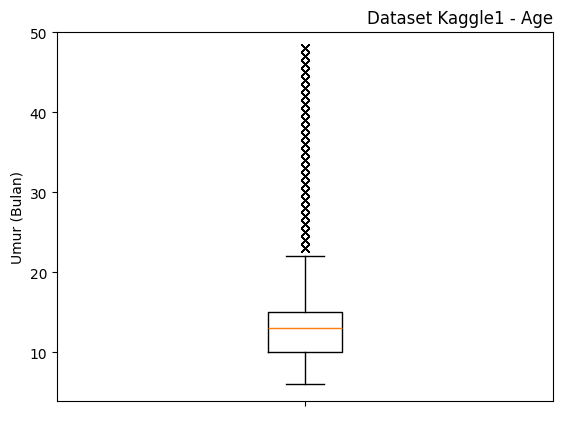

In [11]:
# visualisasi outlier age
plt.boxplot(kaggle1.Age, tick_labels=[' '], sym='x')
plt.ylabel('Umur (Bulan)')
plt.title('Dataset Kaggle1 - Age', loc='right')
plt.show()

In [12]:
# cari outlier Body Weight dataset Kaggle-1
# mencari nilai Q1 dan Q3
Q1_weight = kaggle1['Body Weight'].quantile(0.25)
Q3_weight = kaggle1['Body Weight'].quantile(0.75)
# mencari IQR, batas bawah, dan batas atas
IQR_weight = Q3_weight - Q1_weight
weight_bawah = Q1_weight - 1.5 * IQR_weight
weight_atas = Q3_weight + 1.5 * IQR_weight
# mencari outlier data
outlier_weight = kaggle1.loc[(kaggle1['Body Weight'] < weight_bawah) | (kaggle1['Body Weight'] > weight_atas)]

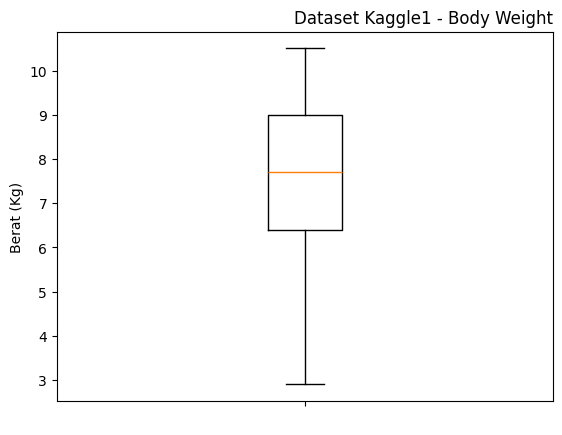

In [13]:
# visualisasi outlier body weight
plt.boxplot(kaggle1['Body Weight'], tick_labels=[' '], sym='x')
plt.ylabel('Berat (Kg)')
plt.title('Dataset Kaggle1 - Body Weight', loc='right')
plt.show()

In [14]:
# cari outlier Body Length dataset Kaggle-1
# mencari nilai Q1 dan Q3
Q1_length = kaggle1['Body Length'].quantile(0.25)
Q3_length = kaggle1['Body Length'].quantile(0.75)
# mencari IQR, batas bawah, dan batas atas
IQR_length = Q3_length - Q1_length
length_bawah = Q1_length - 1.5 * IQR_length
length_atas = Q3_length + 1.5 * IQR_length
# mencari outlier data
outlier_length = kaggle1.loc[(kaggle1['Body Length'] < length_bawah) | (kaggle1['Body Length'] > length_atas)]

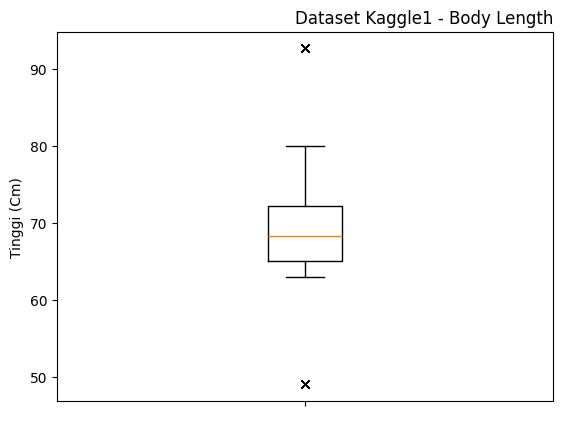

In [15]:
# visualisasi outlier body length
plt.boxplot(kaggle1['Body Length'], tick_labels=[' '], sym='x')
plt.ylabel('Tinggi (Cm)')
plt.title('Dataset Kaggle1 - Body Length', loc='right')
plt.show()

In [16]:
# ubah nama fitur
kaggle1.rename(columns={"Gender":"jenisKelamin", "Age":"umur", "Body Weight":"beratBadan", "Body Length":"tinggiBadan"}, inplace=True)

In [17]:
# hapus data duplikat
kaggle1.drop_duplicates(inplace=True)

In [18]:
# acak susunan dataset
kaggle1 = kaggle1.sample(frac=1, ignore_index=True, random_state=18062025)

In [19]:
# ekspor dataset
kaggle1.to_csv('kaggle1-clean.csv', index=False)